## Analiza letalskih nesreč

#### Priprava podatkov

In [14]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

PlaneCrashes = "./Podatki/PlaneCrashes.csv"
reader = csv.DictReader(open(PlaneCrashes, 'rt', encoding='utf-8'))

#sample = csv.DictReader(open("./Podatki/sample.csv", 'rt', encoding='utf-8'))

### 1. Kako se število nesreč spreminja skozi čas?

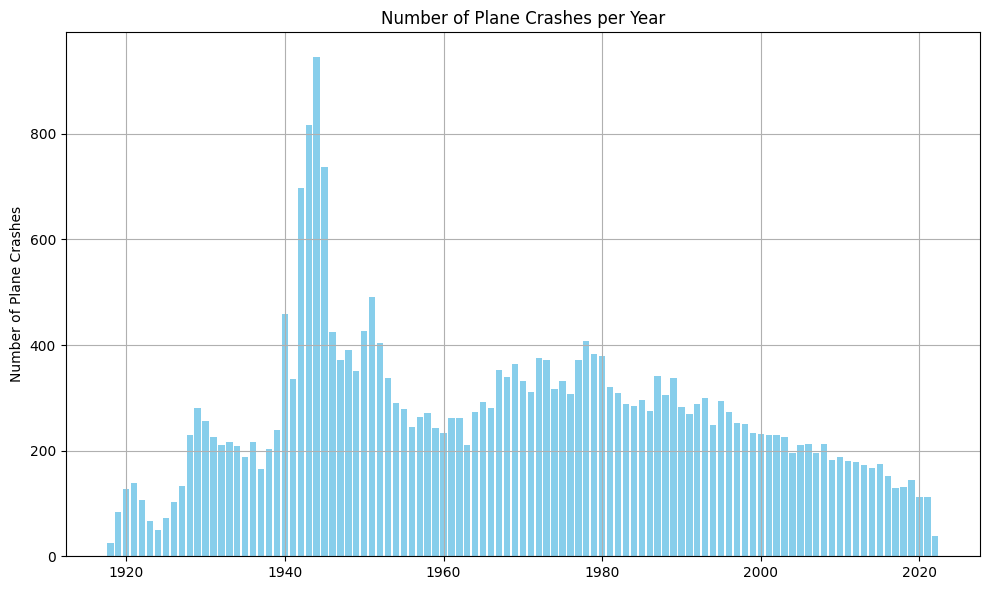

In [15]:
types = {}
for row in reader:
    flight_type = row['Flight type']
    if flight_type.strip():
        types[flight_type] = types.get(flight_type, 0) + 1
    else:
        types['NA'] = types.get('NA', 0) + 1

sorted_types = sorted(types.keys(), key=lambda k: types[k], reverse=True)

flight_types_dict = {}
top_10_types = set(sorted_types[:10])

total_years = defaultdict(int)

for type in top_10_types:
    flight_types_dict[type] = defaultdict(int)

reader = csv.DictReader(open("./Podatki/PlaneCrashes.csv", 'rt', encoding='utf-8'))

for row in reader:
    datum = datetime.strptime(row['Date'], '%Y-%m-%d %H:%M:%S')
    flight_type = row['Flight type']
    if (flight_type in top_10_types):
        flight_types_dict[flight_type][datum.year] += 1
    total_years[datum.year] += 1

x = list(total_years.keys())
y_total = [total_years[year] for year in x]

plt.figure(figsize=(10, 6))

plt.ylabel('Number of Plane Crashes')
plt.title('Number of Plane Crashes per Year')

bars_total_crashes = plt.bar(x, y_total, color='skyblue', label='Total Crashes')

plt.grid(True)

plt.tight_layout()

plt.show()

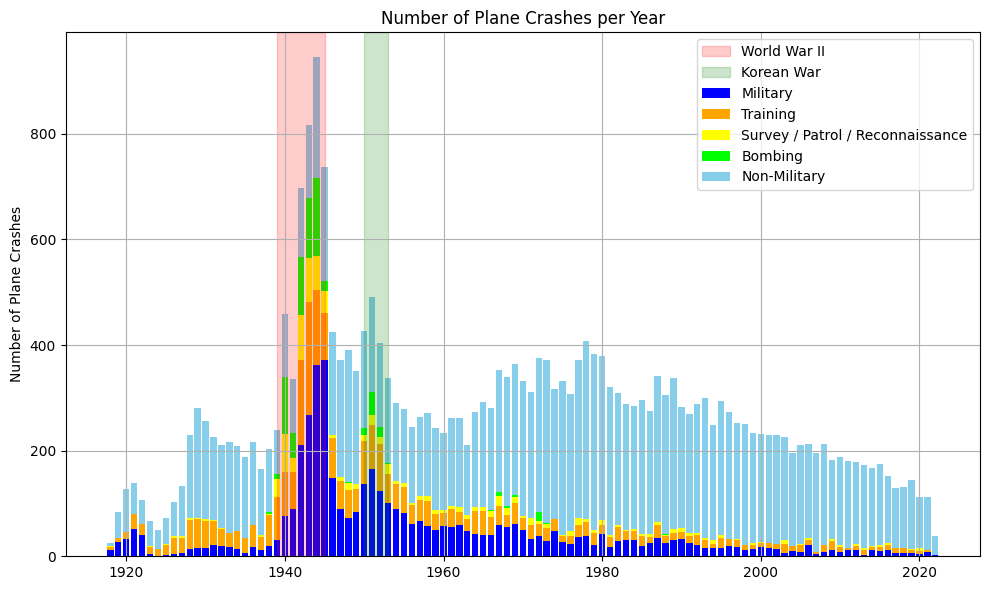

In [25]:
y_military = [flight_types_dict["Military"][year] for year in x]
y_training = [flight_types_dict["Training"][year] for year in x]
y_bombing = [flight_types_dict["Bombing"][year] for year in x]
y_survey = [flight_types_dict["Survey / Patrol / Reconnaissance"][year] for year in x]

plt.figure(figsize=(10, 6))

bars_military = plt.bar(x, y_military, color='blue', label='Military')
bars_training = plt.bar(x, y_training, bottom=y_military, color='orange', label='Training')
bars_survey = plt.bar(x, y_survey, bottom=np.array(y_military) + np.array(y_training), color='yellow', label='Survey / Patrol / Reconnaissance')
bars_bombing = plt.bar(x, y_bombing, bottom=np.array(y_military) + np.array(y_training) + np.array(y_survey), color='lime', label='Bombing')

non_military_y = np.array(y_total) - np.array(y_military) - np.array(y_training) - np.array(y_bombing) - np.array(y_survey)
non_military_bottom = np.array(y_military) + np.array(y_training) + np.array(y_bombing) + np.array(y_survey)
bars_non_military = plt.bar(x, non_military_y, bottom=non_military_bottom, color='skyblue', label='Non-Military')


important_events = {
    "World War II": (1939, 1945),
    "Korean War": (1950, 1953)
}

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'cyan', 'magenta', 'yellow', 'lime', 'pink', 'teal', 'lavender']
color_map = {event: color for event, color in zip(important_events.keys(), colors)}

for event, years_range in important_events.items():
    plt.axvspan(years_range[0], years_range[1], color=color_map[event], alpha=0.2)

legend_labels = []

for event in important_events.keys():
    legend_labels.append(event)

legend_labels.extend(['Military', 'Training', 'Survey / Patrol / Reconnaissance', 'Bombing', 'Non-Military'])

plt.ylabel('Number of Plane Crashes')
plt.title('Number of Plane Crashes per Year')

plt.grid(True)
plt.legend(legend_labels, loc='upper right')

plt.tight_layout()
plt.show()

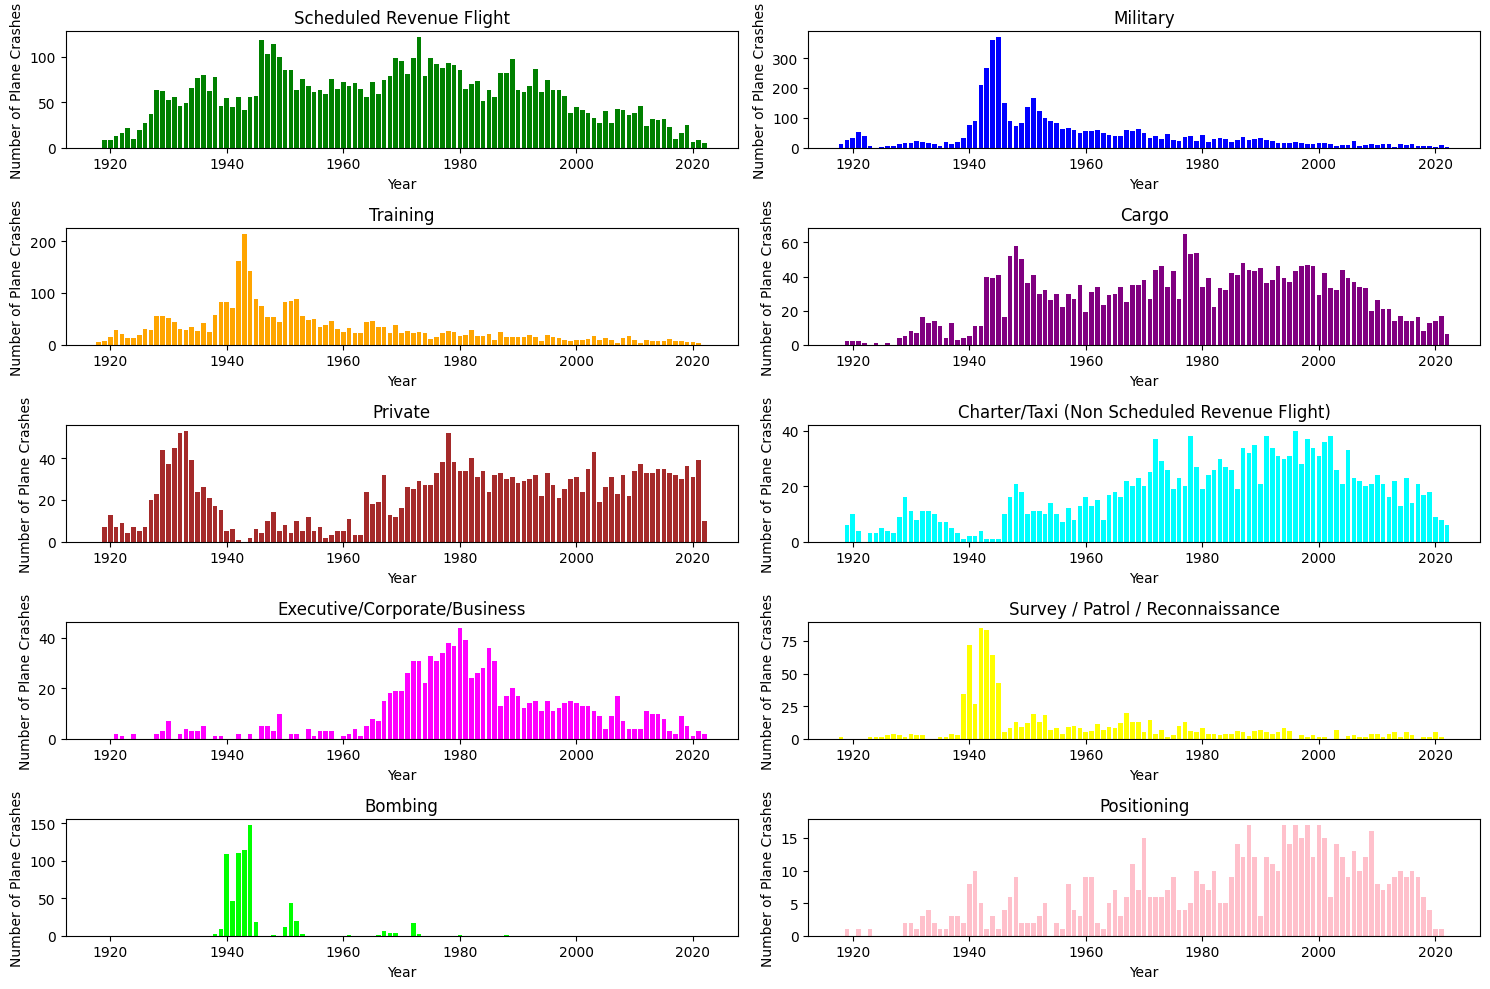

In [17]:
top_10_types = sorted_types[:10]

plt.figure(figsize=(15, 10))

for i, type in enumerate(top_10_types, 1):
    plt.subplot(5, 2, i)
    for year in x:
        plt.bar(year, flight_types_dict[type][year], color=colors[i])
    plt.title(type)
    plt.xlabel('Year')
    plt.ylabel('Number of Plane Crashes')

plt.tight_layout()
plt.show()


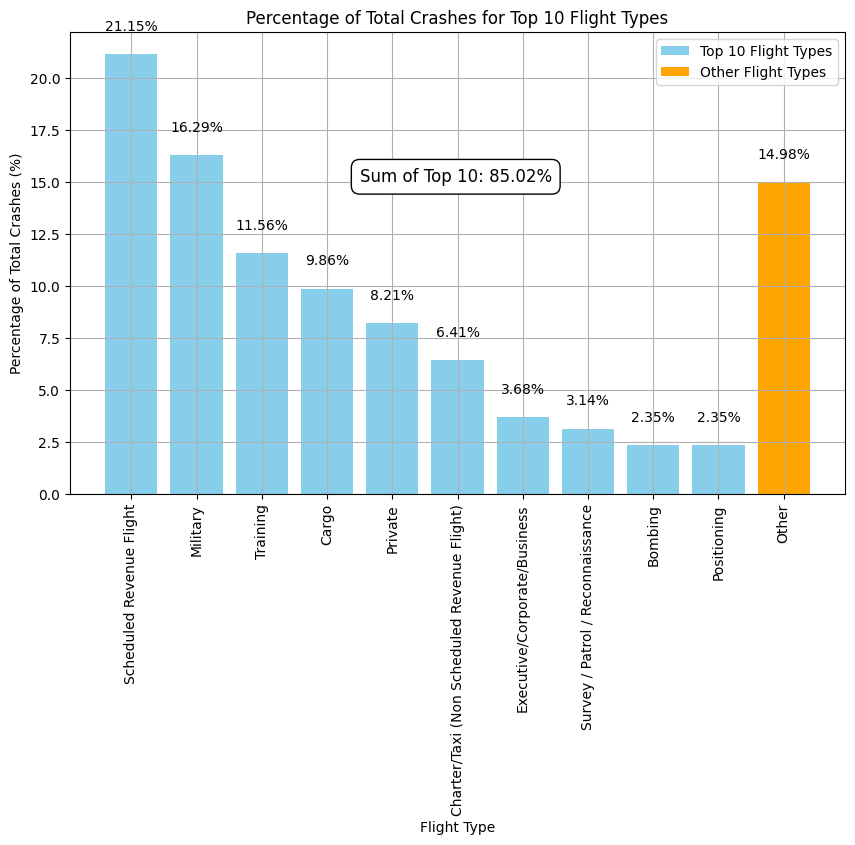

In [18]:
percentages = [(types[flight_type] / (sum(total_years.values()))) * 100 for flight_type in top_10_types]
sum_percentages_top_10 = sum(percentages)
percentage_other = 100 - sum_percentages_top_10

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_types, percentages, color='skyblue', label='Top 10 Flight Types')
plt.bar('Other', percentage_other, color='orange', label='Other Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Percentage of Total Crashes (%)')
plt.title('Percentage of Total Crashes for Top 10 Flight Types')
plt.xticks(rotation=90)
plt.grid(True)

for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.text('Other', percentage_other + 1, f'{percentage_other:.2f}%', ha='center', va='bottom')

sum_label = f'Sum of Top 10: {sum_percentages_top_10:.2f}%'
plt.text(3.5, 15, sum_label, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.legend()
plt.show()




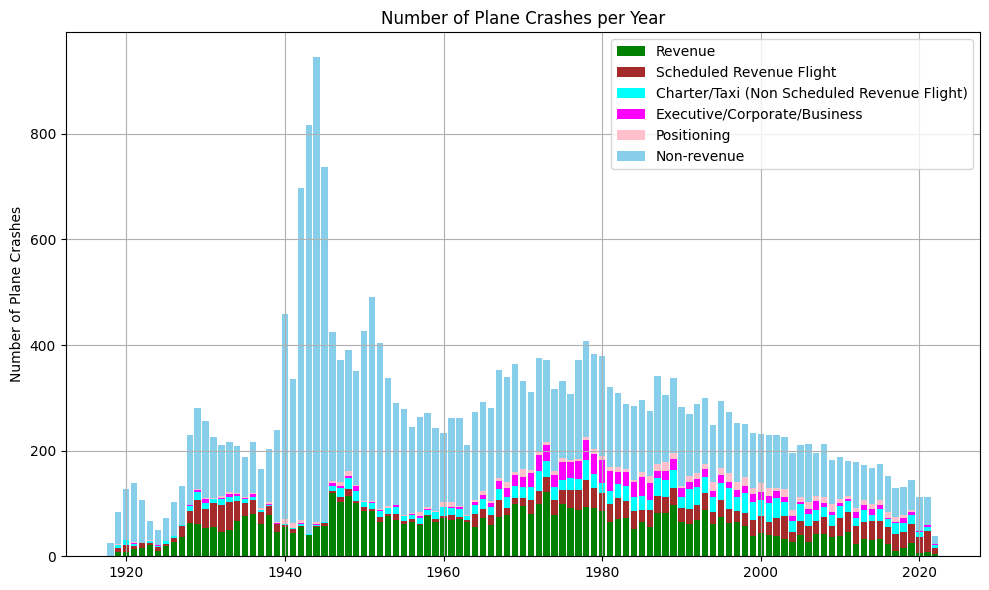

In [33]:
y_revenue = [flight_types_dict["Scheduled Revenue Flight"][year] for year in x]
y_taxi = [flight_types_dict["Charter/Taxi (Non Scheduled Revenue Flight)"][year] for year in x]
y_business = [flight_types_dict["Executive/Corporate/Business"][year] for year in x]
y_private = [flight_types_dict["Private"][year] for year in x]
y_positioning = [flight_types_dict["Positioning"][year] for year in x]

plt.figure(figsize=(10, 6))

bars_revenue = plt.bar(x, y_revenue, color='green', label='Revenue')
bars_private = plt.bar(x, y_private, bottom=y_revenue, color='brown', label='Scheduled Revenue Flight')
bars_taxi = plt.bar(x, y_taxi, bottom=np.array(y_private) + np.array(y_revenue), color='cyan', label='Charter/Taxi (Non Scheduled Revenue Flight)')
bars_business = plt.bar(x, y_business, bottom=np.array(y_taxi) + np.array(y_private) + np.array(y_revenue), color='magenta', label='Executive/Corporate/Business')
bars_positioning = plt.bar(x, y_positioning, bottom=np.array(y_taxi) + np.array(y_private) + np.array(y_revenue) + np.array(y_business), color='pink', label='Positioning')

non_revenue_y = np.array(y_total) - np.array(y_taxi) - np.array(y_private) - np.array(y_revenue) - np.array(y_business) - np.array(y_positioning)
non_revenue_bottom = np.array(y_taxi) + np.array(y_private) + np.array(y_revenue) + np.array(y_business) + np.array(y_positioning)
bars_non_revenue = plt.bar(x, non_revenue_y, bottom=non_revenue_bottom, color='skyblue', label='Non-revenue')

plt.ylabel('Number of Plane Crashes')
plt.title('Number of Plane Crashes per Year')

plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()